In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import geeksw.hgcal.testbeam as hgc

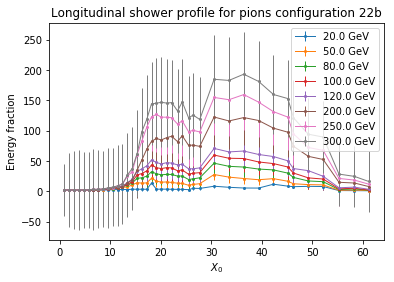

In [4]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query("Configuration == '22b'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = pion_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    p = pd.DataFrame.quantile(energy_sums, [0.30,0.70])
    p1 = p.rechit_energy[0.30]
    p2 = p.rechit_energy[0.70]
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums = energy_sums[p1 <= energy_sums.rechit_energy]
    energy_sums = energy_sums[energy_sums.rechit_energy <= p2]
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 22b")
plt.show()    
    

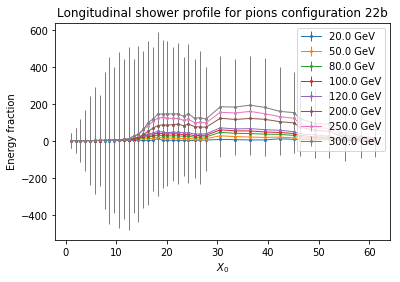

In [3]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query("Configuration == '22b'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = pion_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 22b")
plt.show()   

      rechit_X0   event  rechit_energy
0.25     11.934  2511.0       7.250073
0.75     46.279  7533.0     182.097412


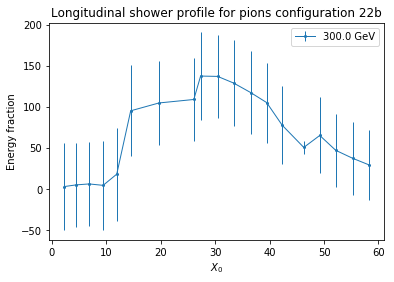

In [5]:
hdf = hgc.load_run(1165, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
energy = hdf.beamEnergy.values[0]
energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
energy_sums = energy_sums.reset_index()
p = pd.DataFrame.quantile(energy_sums, [0.25,0.75])
print (p)
p1 = p.rechit_energy[0.25]
p2 = p.rechit_energy[0.75]

energy_sums_mean = energy_sums.groupby("rechit_X0").median()
energy_sums = energy_sums[p1 <= energy_sums.rechit_energy]
energy_sums = energy_sums[energy_sums.rechit_energy <= p2]
energy_sums_variance = energy_sums.groupby("rechit_X0").std()
energy_sums_variance = energy_sums_variance.reset_index()
energy_sums_mean = energy_sums_mean.reset_index()
plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 22b")
plt.show()    

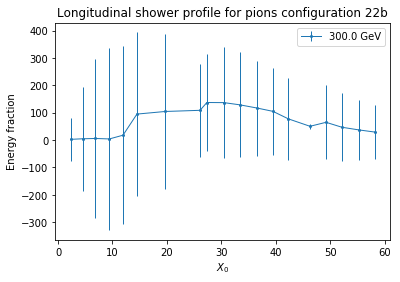

In [30]:
hdf = hgc.load_run(1165, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
energy = hdf.beamEnergy.values[0]
energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
energy_sums = energy_sums.reset_index()
energy_sums_mean = energy_sums.groupby("rechit_X0").median()
energy_sums_variance = energy_sums.groupby("rechit_X0").std()
energy_sums_variance = energy_sums_variance.reset_index()
energy_sums_mean = energy_sums_mean.reset_index()
plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 22b")
plt.show()    

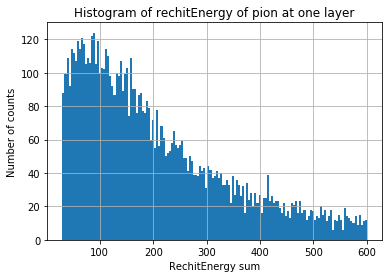

In [42]:
hdf = hgc.load_run(1165, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
energy = hdf.beamEnergy.values[0]
energy_sums = hdf.groupby(["rechit_layer","event"]).rechit_energy.sum()
energy_sums = energy_sums.reset_index()
#print (energy_sums)
energy_sums.query("rechit_layer =='10'").rechit_energy.hist(bins = np.linspace(30,600,150))
plt.xlabel("RechitEnergy sum")
plt.ylabel("Number of counts")
plt.title("Histogram of rechitEnergy of pion at one layer")
plt.show()  

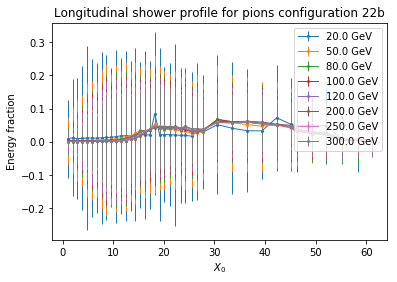

In [5]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query("Configuration == '22b'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = pion_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 22b")
plt.show()    

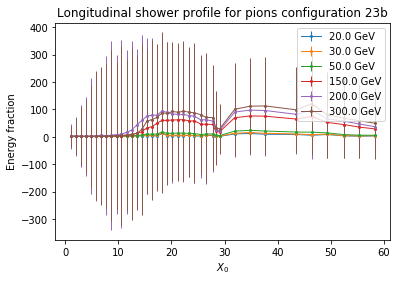

In [6]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query("Configuration == '23b'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = pion_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 23b")
plt.show()    

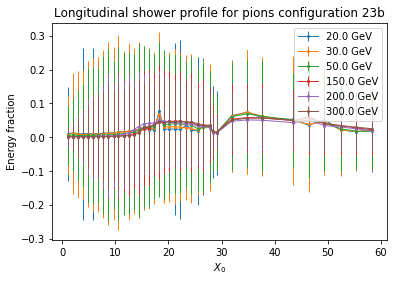

In [7]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query("Configuration == '23b'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = pion_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 23b")
plt.show() 

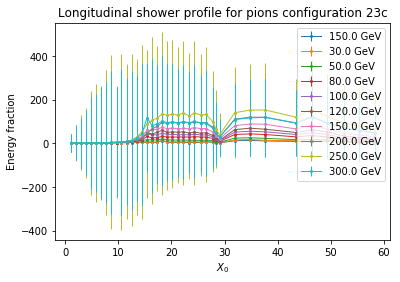

In [8]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query("Configuration == '23c'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = pion_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 23c")
plt.show()    

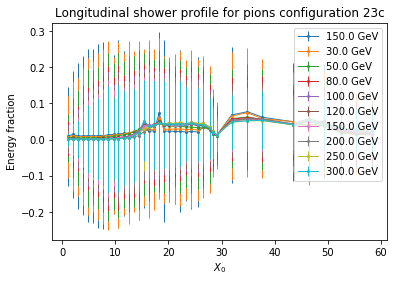

In [9]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query("Configuration == '23c'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = pion_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 23c")
plt.show()    

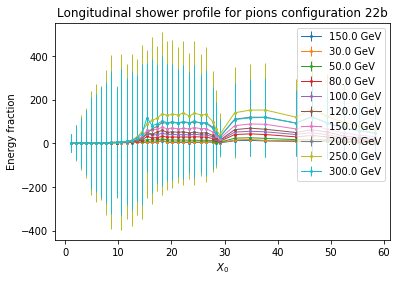

In [10]:
run_numbers = pion_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sums_mean["rechit_energy"].sum()
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sums_variance["rechit_energy"].sum()
    #energy_sums_mean
    #energy_sums_variance
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for pions configuration 22b")
plt.show()    
    